### 1. 데이터 Load 및 확인

In [40]:
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()
cancer_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [41]:
# 입력데이터 (독립변수)
print(cancer_data.feature_names)
print(cancer_data.data.shape)
cancer_data.data[:10]

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
(569, 30)


array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [42]:
# 레이블 (종속변수)
print(cancer_data.target_names)
print(cancer_data.target.shape)
cancer_data.target[:30]

['malignant' 'benign']
(569,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0])

In [43]:
# 레이블의 종류별 개수
import numpy as np
print(np.bincount(cancer_data.target))

for n, v in zip(cancer_data.target_names, np.bincount(cancer_data.target)):
    print(n, v)
    
print('레이블의 종류 개수 \n{}'.format(
    {n:v for n, v in zip(cancer_data.target_names, np.bincount(cancer_data.target))}
))

[212 357]
malignant 212
benign 357
레이블의 종류 개수 
{'malignant': 212, 'benign': 357}


### 2. 훈련 데이터와 검증 데이터 나누기

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer_data.data, cancer_data.target, random_state=42, test_size=0.2)

In [45]:
print('훈련 데이터 ', X_train.shape, y_train.shape)
print('검증 데이터 ', X_test.shape, y_test.shape)

훈련 데이터  (455, 30) (455,)
검증 데이터  (114, 30) (114,)


### 3. KNN 알고리즘 선택하고 학습 및 예측

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier(n_neighbors=11)
model

# 학습
model.fit(X_train, y_train)
# 예측
y_predic = model.predict(X_test)
print('예측 정확도 {0:.4f}'.format(accuracy_score(y_predic, y_test)))
print('예측 정확도 {0:.4f}'.format(model.score(X_test, y_test)))

예측 정확도 0.9825
예측 정확도 0.9825


### 4. KNN 알고리즘의 n_neighbors 개수를 다르게 설정해서 여러번 학습 및 예측

In [49]:
# 학습데이터 점수
train_accuracy = []
# 검증데이터 점수
test_accuracy = []

neighbors_settings = range(1, 21)
for neighbors in neighbors_settings:
    model = KNeighborsClassifier(n_neighbors=neighbors)
    model.fit(X_train, y_train)
    train_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))
    
print('학습데이터 정확도 \n', train_accuracy)
print('학습데이터 정확도 \n', test_accuracy)

학습데이터 정확도 
 [1.0, 0.9648351648351648, 0.9494505494505494, 0.9494505494505494, 0.9406593406593406, 0.9362637362637363, 0.9406593406593406, 0.9384615384615385, 0.9318681318681319, 0.9296703296703297, 0.9318681318681319, 0.9318681318681319, 0.9296703296703297, 0.9274725274725275, 0.9230769230769231, 0.9252747252747253, 0.9230769230769231, 0.9274725274725275, 0.9208791208791208, 0.9230769230769231]
학습데이터 정확도 
 [0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9736842105263158, 0.9824561403508771, 0.9824561403508771, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544]


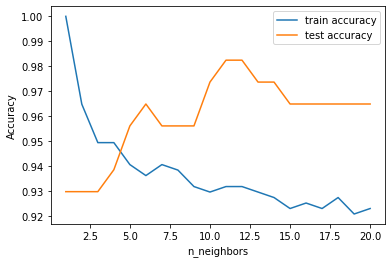

In [50]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(neighbors_settings, train_accuracy, label='train accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

* 이웃의 수가 하나 일때는 훈련 데이터의 예측은 완벽하다
* 이웃의 수가 늘어나면 모델이 단순해지고, 훈련데이터의 정확도는 줄어든다.
* 테스트 데이터의 정확도는 이웃을 많이 사용했을 때 높아진다.